In [215]:
import numpy as np
import sklearn as sl
import csv
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

%matplotlib inline

# Dataset loading

## Loading

In [216]:
def load(path):
    with open(path, 'r') as f:
        data = []
        reader = csv.reader(f, delimiter=',')
        t = False
        for l in reader:
            if len(l) > 0 and l[0] == "@data":
                t = True
                continue
            if t:
                d = []
                for v in l:
                    d.append(float(v))
                data.append(d)
        data = np.array(data)
        return data[:, 0:-1], data[:, -1]

### Test loading

In [217]:
x, y = load('../../res/noiseless_Karlo/noiseless_all_testing_9class.arff')
print(x.shape)
print(y.shape)

(33334, 50)
(33334,)


## Utils

In [218]:
from sklearn.decomposition import PCA

def plot_dataset(x,y):
    pca = PCA(n_components=2)
    x_d = pca.fit_transform(x)
    plt.scatter(x_d[:,0], x_d[:,1], c=y, marker='2')
    plt.show()
    
def analyse_dataset(x, y):
    fig1 = plt.figure(figsize=(15,15))
    gs = gridspec.GridSpec(2, 2, width_ratios=[1, 1], height_ratios=[1, 4])
    
    plt.subplot(gs[0,0])
    t_min = np.amin(x, axis=0)
    t_max = np.amax(x, axis=0)
    plt.fill_between(range(len(t_min)), t_min, t_max, facecolor='blue')
    plt.title("Ranges of inputs")
    
    plt.subplot(gs[0,1])
    plt.title("Class distribution")
    ctr = Counter(y)
    plt.hist(y, bins=len(ctr), facecolor='blue', histtype=u'step', normed=False)
    
    plt.subplot(gs[1,:])
    plt.title("Instances")
    plt.axis('equal')
    plot_dataset(train_x, train_y)
    
    return fig1

def save_plot(figure, name):
    figure.savefig(name)

## Available datasets

In [219]:
noiseless_9class_train = '../../res/noiseless_Karlo/noiseless_all_training_9class.arff'
noiseless_9class_test = '../../res/noiseless_Karlo/noiseless_all_testing_9class.arff'
noiseless_256class_train = '../../res/noiseless_Karlo/noiseless_all_training_256class.arff'
noiseless_256class_test = '../../res/noiseless_Karlo/noiseless_all_testing_256class.arff'

noisy_9class_train = '../../res/noisy/100k/9class/noisy_9class_100k_train.arff'
noisy_9class_test = '../../res/noisy/100k/9class/noisy_9class_100k_test.arff'
noisy_256class_train = '../../res/noisy/100k/256class/noisy_256class_100k_train.arff'
noisy_256class_test = '../../res/noisy/100k/256class/noisy_256class_100k_test.arff'

# Noiseless - Hamming distance (9 class)

### Train

In [220]:
train_x, train_y = load(noiseless_9class_train)

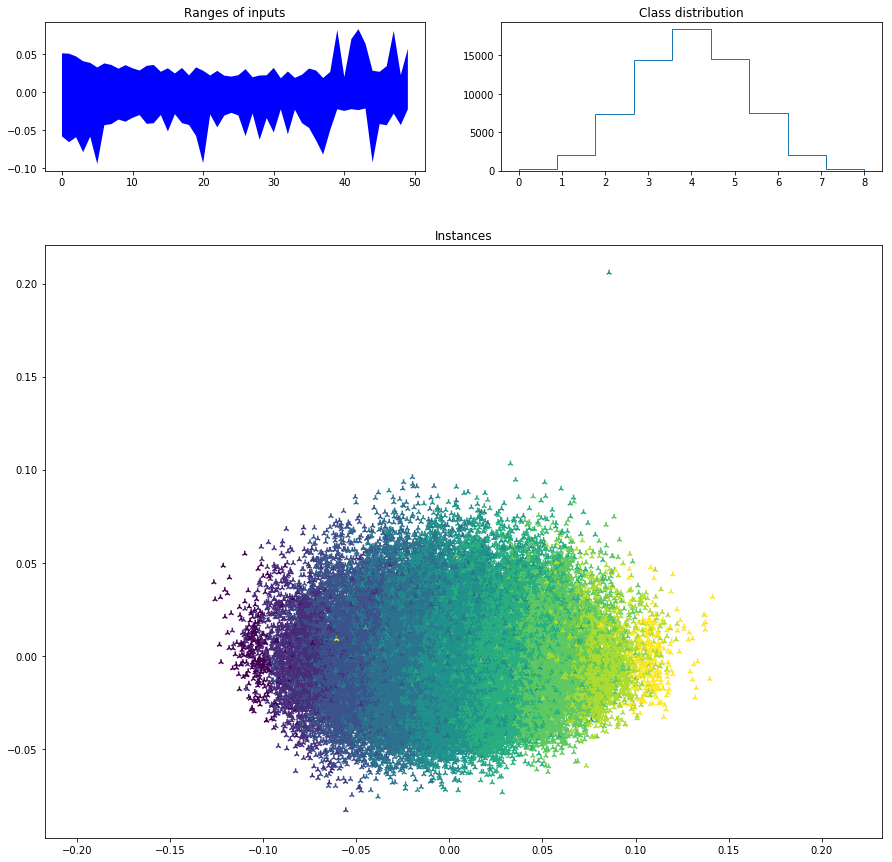

In [221]:
f = analyse_dataset(train_x, train_y)
#save_plot(f, "image.pdf")

### Test

In [222]:
test_x, test_y = load(noiseless_9class_test)

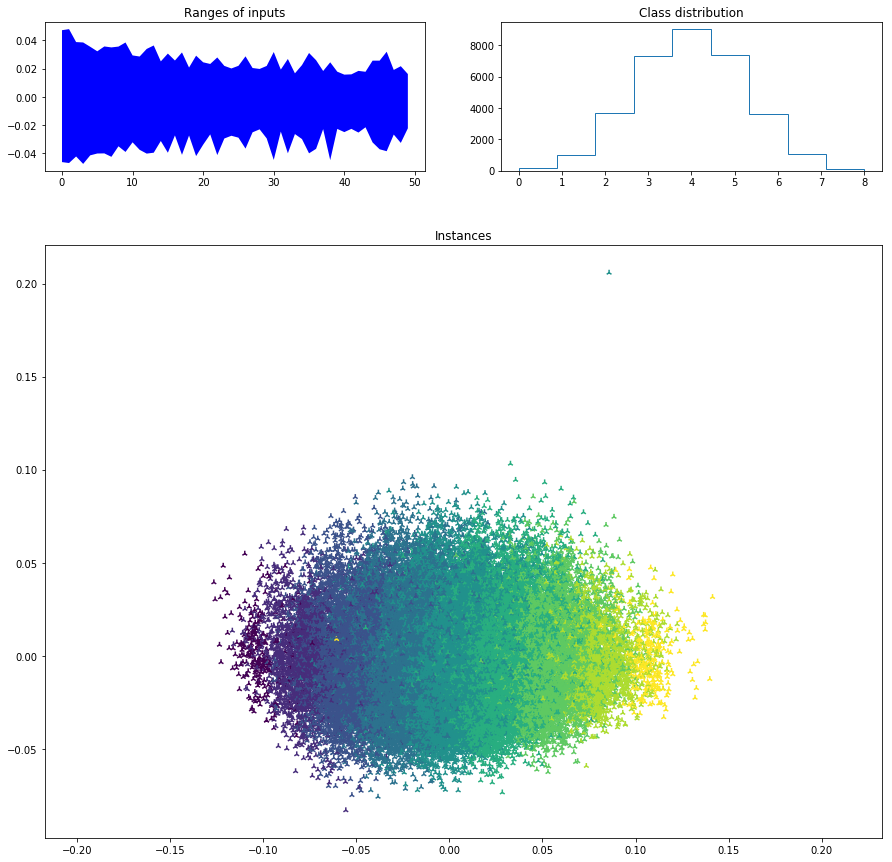

In [223]:
f = analyse_dataset(test_x, test_y)

### Joined

In [224]:
X = np.vstack([train_x, test_x])
Y = np.concatenate([train_y, test_y])

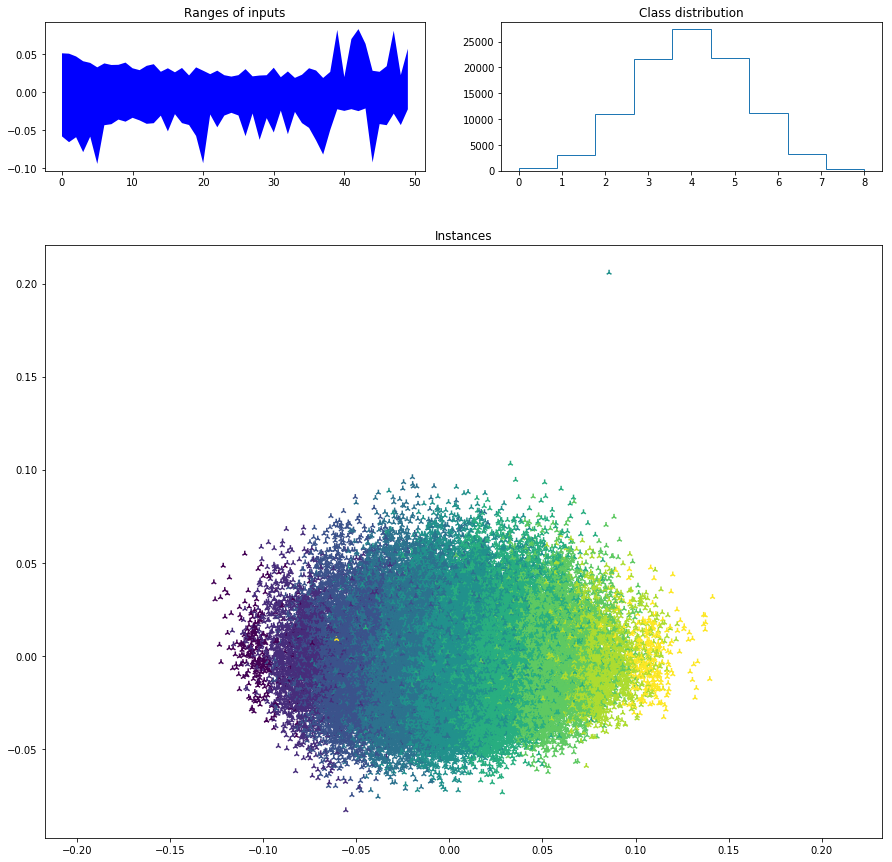

In [225]:
f = analyse_dataset(X, Y)

# Noiseless - Original byte (256 class)

### Train

In [246]:
train_x, train_y = load(noiseless_256class_train)

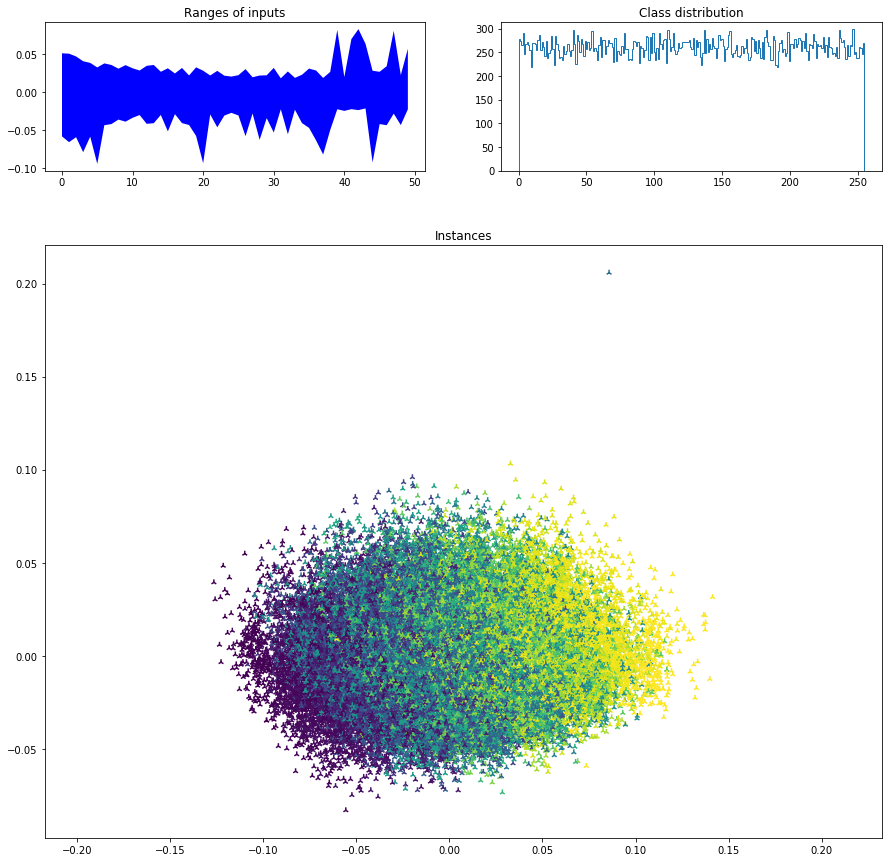

In [247]:
f = analyse_dataset(train_x, train_y)

### Test

In [248]:
test_x, test_y = load(noiseless_256class_test)

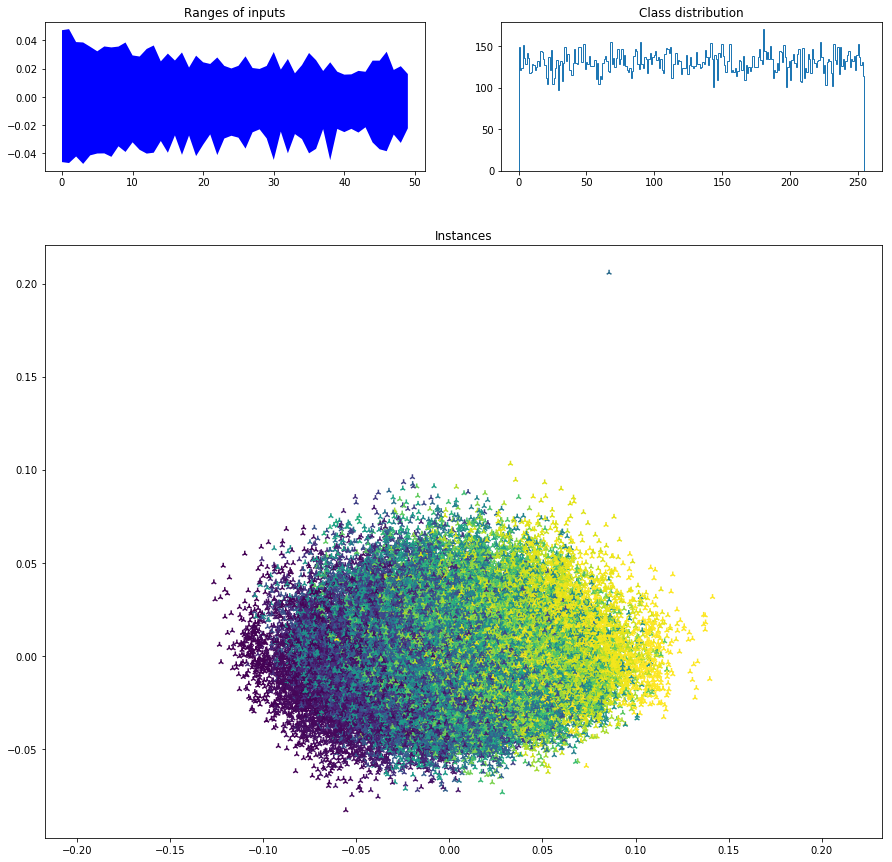

In [249]:
f = analyse_dataset(test_x, test_y)

### Joined

In [250]:
X = np.vstack([train_x, test_x])
Y = np.concatenate([train_y, test_y])

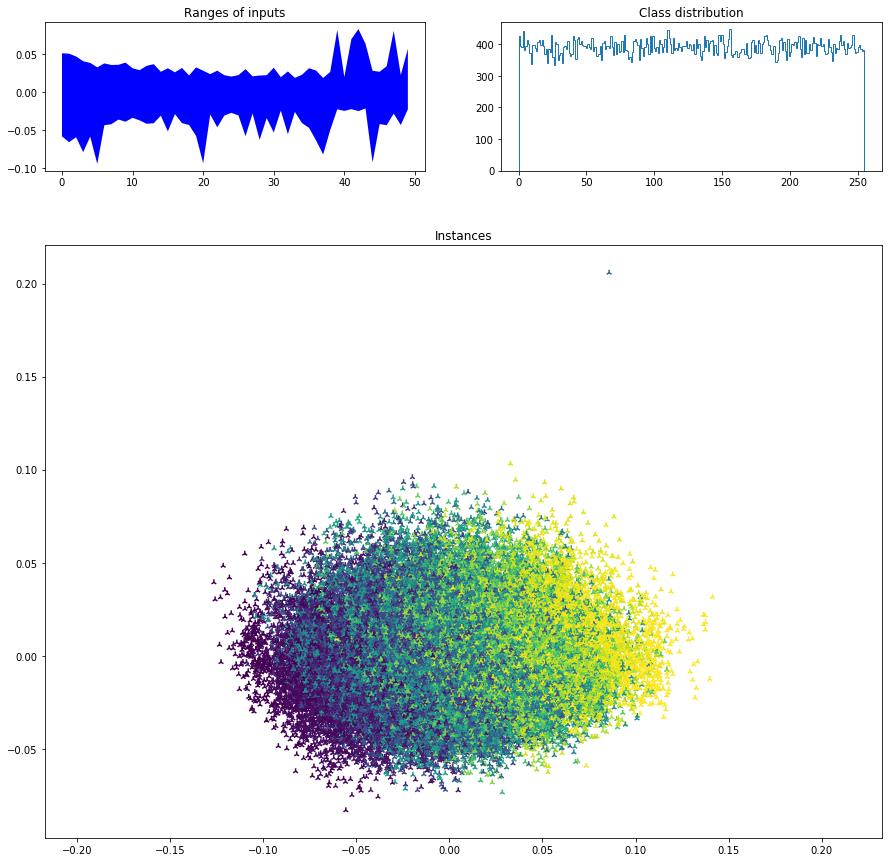

In [251]:
f = analyse_dataset(X, Y)

# Noisy - Hamming distance (9 class)

### Train

In [232]:
train_x, train_y = load(noisy_9class_train)

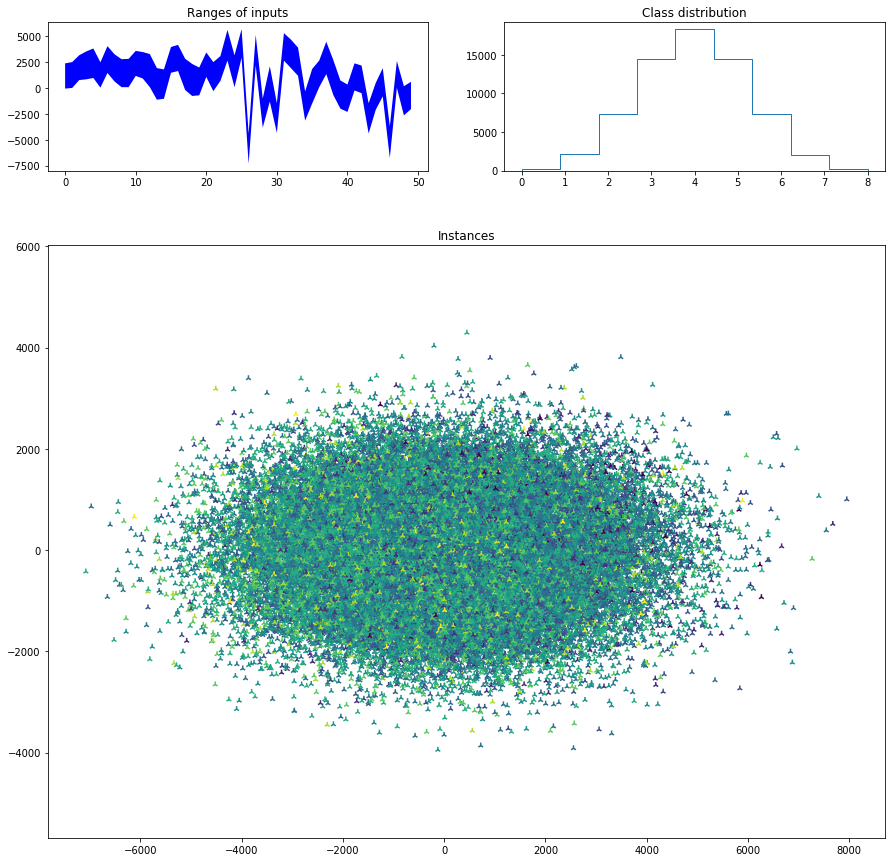

In [233]:
f = analyse_dataset(train_x, train_y)

### Test

In [234]:
test_x, test_y = load(noisy_9class_train)

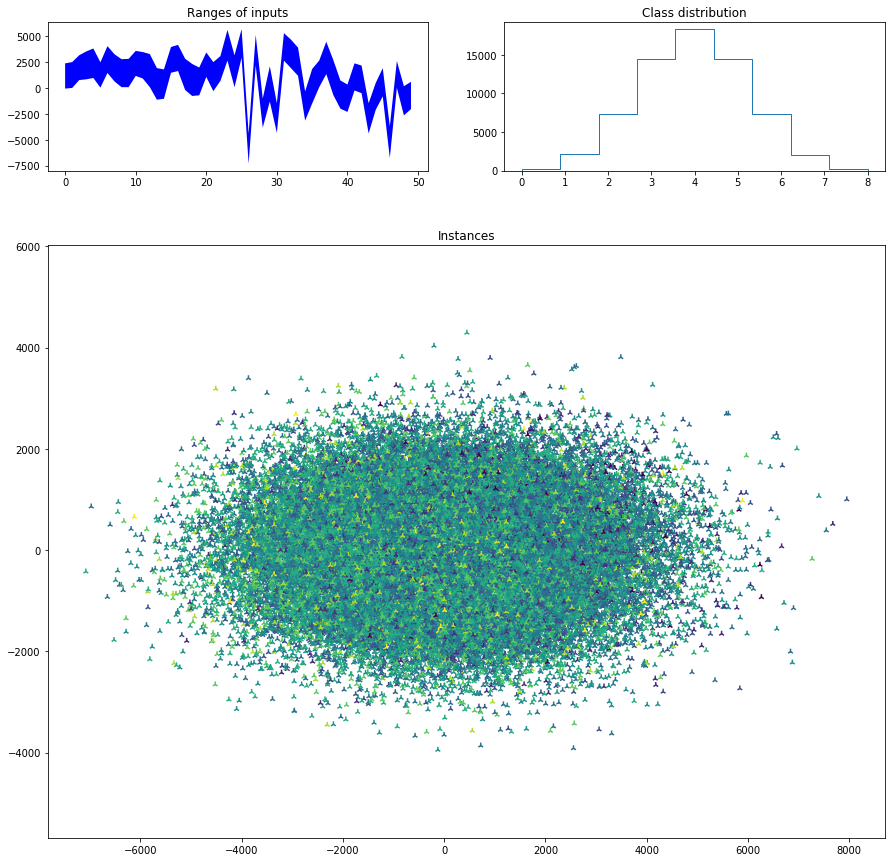

In [235]:
f = analyse_dataset(test_x, test_y)

### Joined

In [236]:
X = np.vstack([train_x, test_x])
Y = np.concatenate([train_y, test_y])

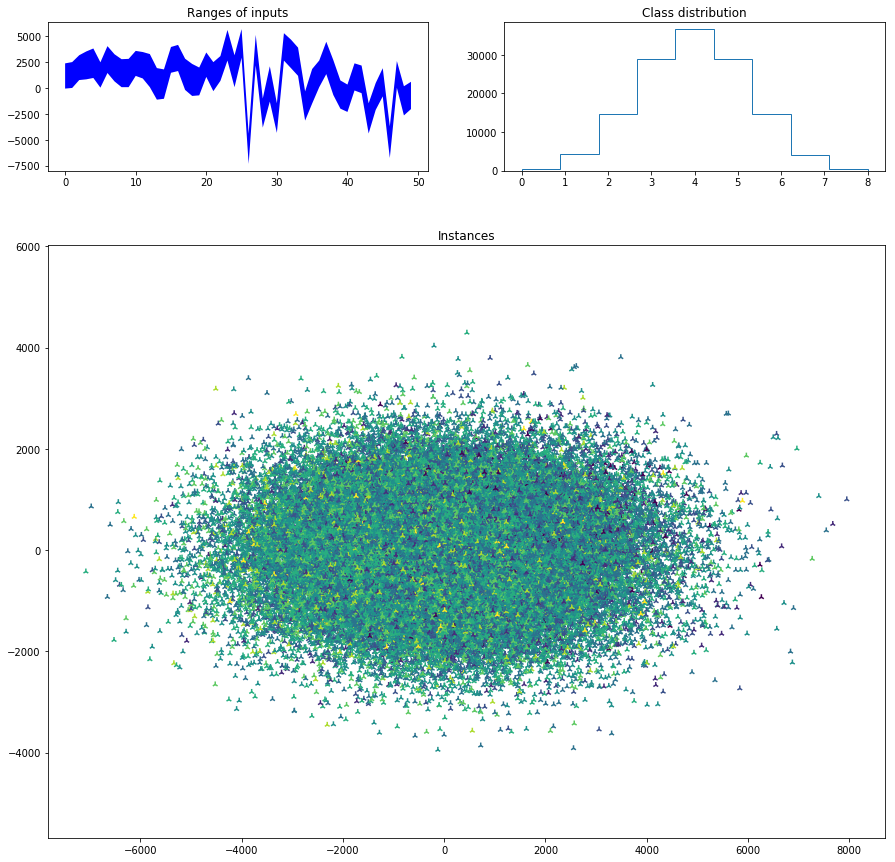

In [237]:
f = analyse_dataset(X, Y)

# Noisy - Original byte (256 class)

### Train

In [238]:
train_x, train_y = load(noisy_256class_train)

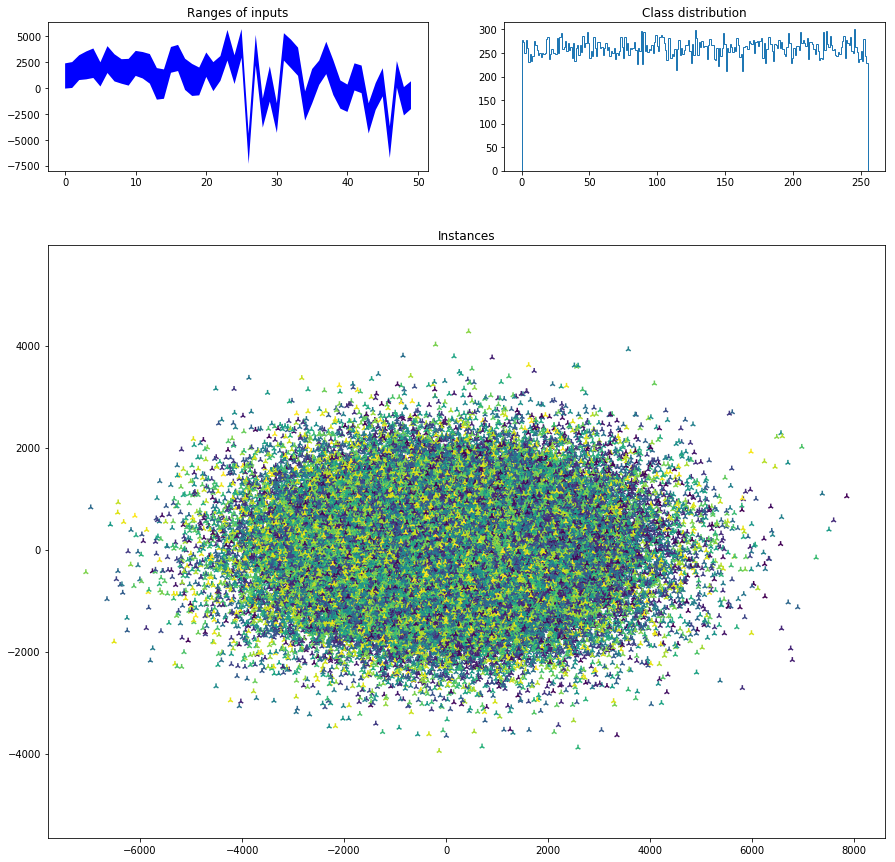

In [239]:
f = analyse_dataset(train_x, train_y)

### Test

In [240]:
test_x, test_y = load(noisy_256class_train)

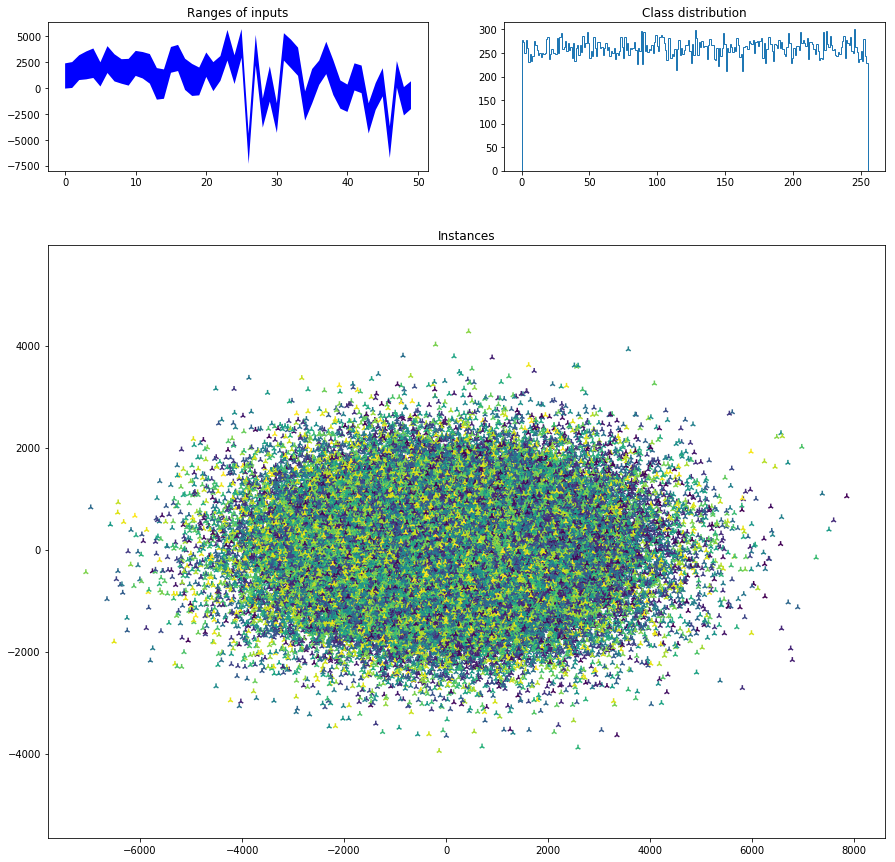

In [241]:
f = analyse_dataset(test_x, test_y)

### Joined

In [242]:
X = np.vstack([train_x, test_x])
Y = np.concatenate([train_y, test_y])

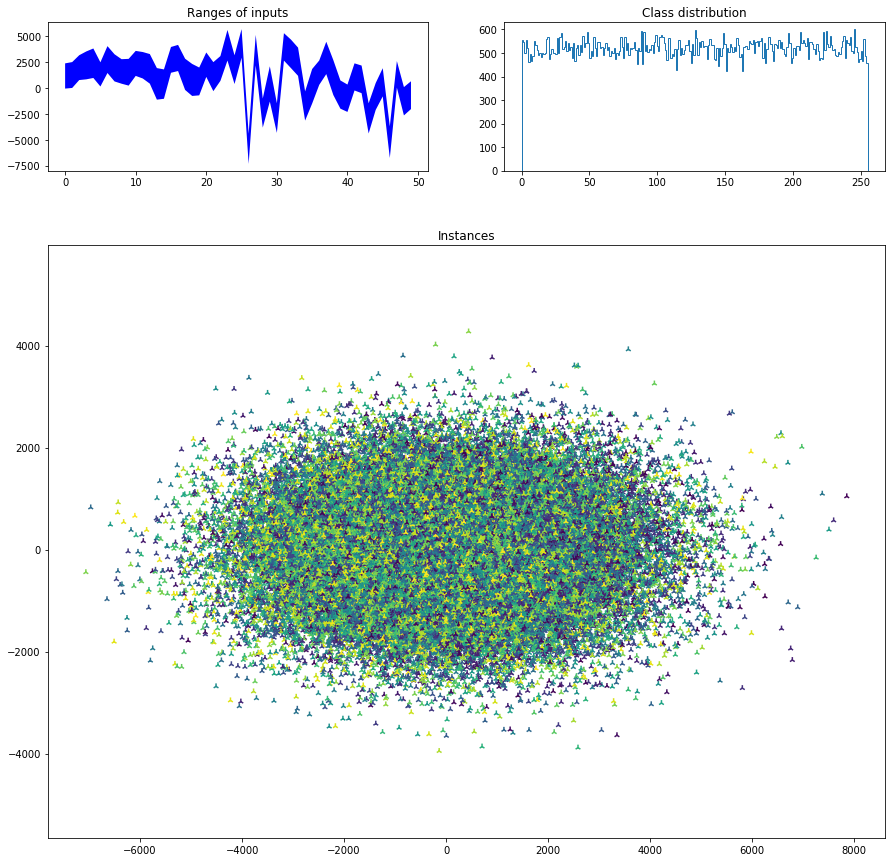

In [243]:
f = analyse_dataset(X, Y)